<a href="https://colab.research.google.com/github/KavinAgrawal/ML-Techniques/blob/master/Gradient_Descent_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [0]:
class Gd_dsnt:
  
  def __init__(self,learn_rate,no_iters,rand_state=1):
    self.learn_rate = learn_rate
    self.no_iters = no_iters
    self.rand_state = rand_state
    
  def fit(self, x, y):
    rgen = np.random.RandomState(self.rand_state)
    self.w = rgen.normal(loc=0.0, scale=0.01,size=1 + x.shape[1])
#     self.w = np.random.normal(loc=0.0, scale=0.01, size=1+x.shape[1])
    self.cost = []
    for i in range(self.no_iters):
      cost=0
      error =y-self.act_in_out(x)
      self.w[1:]+=self.learn_rate*np.dot(x.T,error)
      self.w[0]+=self.learn_rate*np.sum(error)
      cost=(1/2.0)*(np.sum(error**2))
      self.cost.append(cost)
    return self 
  
  def act_in_out(self, X):
    return np.dot(X, self.w[1:]) + self.w[0]
     
  def predict(self,x): # While the linear activation function is used for learning the weights, we still use a threshold function to make the final prediction,
    return np.where(self.act_in_out(x)>=0.0,1,-1)
  


In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
df.tail() #tail method more useful because it also shows the final no of columns

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [0]:
y = df.iloc[0:100,4].values
y = np.where(y=='Iris-setosa',1,-1)
x = df.iloc[0:100, [0, 2]].values

x_test=df.iloc[100:150,[0,2]].values
y_test=df.iloc[100:150,4].values
y_test=np.where(y_test=='Iris-setosa',1,-1)

Text(0.5, 1.0, 'Gradient Descent - Learning Rate 0.01')

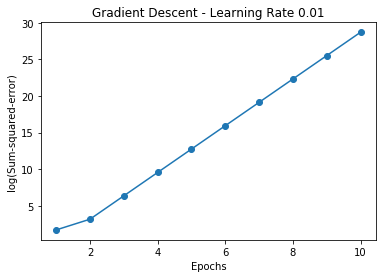

In [0]:
#High Learn Rate
model1=Gd_dsnt(no_iters=10, learn_rate=0.01).fit(x, y)
plt.plot(range(1, len(model1.cost) + 1), np.log10(model1.cost), marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(Sum-squared-error)')
plt.title('Gradient Descent - Learning Rate 0.01')

Text(0.5, 1.0, 'Gradient Descent - Learning Rate 0.0001')

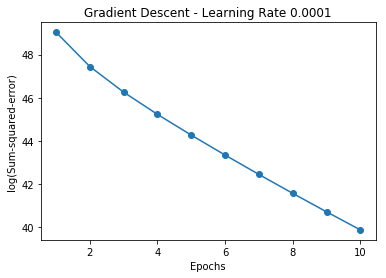

In [0]:
#Low Learn Rate
model2=Gd_dsnt(no_iters=10, learn_rate=0.0001).fit(x, y)
plt.plot(range(1, len(model2.cost) + 1), model2.cost, marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(Sum-squared-error)')
plt.title('Gradient Descent - Learning Rate 0.0001')

Text(0.5, 1.0, 'Gradient Descent - Learning Rate 0.01')

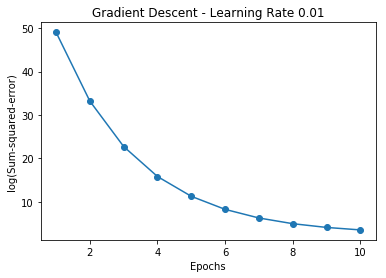

In [0]:
#Normalization and modelling
x_norm = np.copy(x)
x_norm[0:,0] = (x_norm[0:,0] - x_norm[0:,0].mean())/x_norm[0:,0].std()
x_norm[0:,1] = (x_norm[0:,1] - x_norm[0:,1].mean())/x_norm[0:,1].std()
x_norm


model3=Gd_dsnt(no_iters=10, learn_rate=0.01).fit(x_norm, y)
plt.plot(range(1, len(model3.cost) + 1), model3.cost, marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(Sum-squared-error)')
plt.title('Gradient Descent - Learning Rate 0.01')

In [0]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')

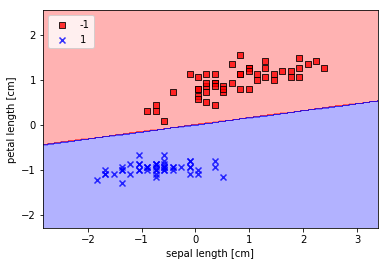

In [0]:
plot_decision_regions(x_norm, y, classifier=model3)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()